# Introdução às Redes Neurais Artificiais

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
iris = load_iris()
x = iris.data
y = iris.target

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [4]:
per_clf = Perceptron()
per_clf.fit(x_train, y_train)
y_pred = per_clf.predict([[2, 0.5, 1.4, 0.2]])

In [5]:
y_pred

array([1])

In [6]:
per_clf.score(x_test, y_test)

0.7666666666666667

In [7]:
per_clf = Perceptron()
scores = cross_val_score(per_clf, x, y, cv=5)
scores

array([0.66666667, 0.7       , 0.76666667, 0.83333333, 0.66666667])

In [8]:
scores.mean()

0.7266666666666667

### Keras e Tensorflow

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
tf.__version__

'2.15.0'

In [12]:
fashion_mnist = keras.datasets.fashion_mnist

In [13]:
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [14]:
x_train_full.shape

(60000, 28, 28)

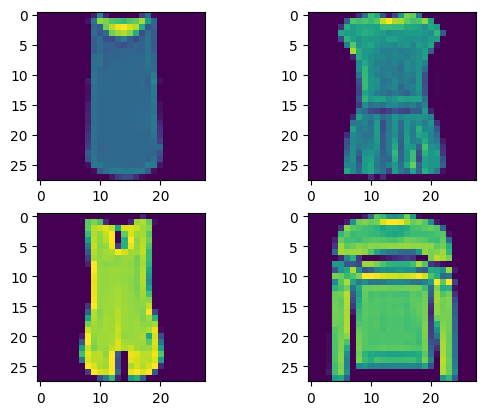

In [15]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].imshow(x_train_full[2])
axes[0, 1].imshow(x_train_full[3])
axes[1, 0].imshow(x_train_full[4])
axes[1, 1].imshow(x_train_full[5]);

In [16]:
x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [17]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [18]:
class_names[y_train[0]]

'Coat'

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
hidden1 = model.layers[1]

In [22]:
hidden1.name

'dense'

In [23]:
weights, biases = hidden1.get_weights()

In [24]:
weights, biases

(array([[ 0.06422772,  0.06426533,  0.04349335, ...,  0.05463988,
         -0.00046071,  0.01811524],
        [ 0.03412236, -0.06713255,  0.06318229, ..., -0.00119252,
          0.03091362, -0.01174939],
        [ 0.0057512 , -0.07041263, -0.03978193, ...,  0.06875998,
         -0.03294775,  0.06843209],
        ...,
        [-0.02395084, -0.01778591,  0.01913133, ..., -0.06992539,
          0.0021019 , -0.05146056],
        [ 0.04898954,  0.06693497, -0.00418709, ...,  0.07022905,
         -0.02530986, -0.0488512 ],
        [-0.02187842,  0.01069997,  0.05735889, ..., -0.0530641 ,
         -0.04244452,  0.05117941]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [26]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [28]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30


1719/1719 [==============================] - 5s 2ms/step - loss: 0.7211 - accuracy: 0.7641 - val_loss: 0.4934 - val_accuracy: 0.8386
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4876 - accuracy: 0.8304 - val_loss: 0.4306 - val_accuracy: 0.8576
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4414 - accuracy: 0.8464 - val_loss: 0.4155 - val_accuracy: 0.8592
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4131 - accuracy: 0.8547 - val_loss: 0.3976 - val_accuracy: 0.8626
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3937 - accuracy: 0.8633 - val_loss: 0.4272 - val_accuracy: 0.8416
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3790 - accuracy: 0.8668 - val_loss: 0.4048 - val_accuracy: 0.8612
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3658 - accuracy: 0.8710 - val_loss: 0.3645 - val_accurac

In [29]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

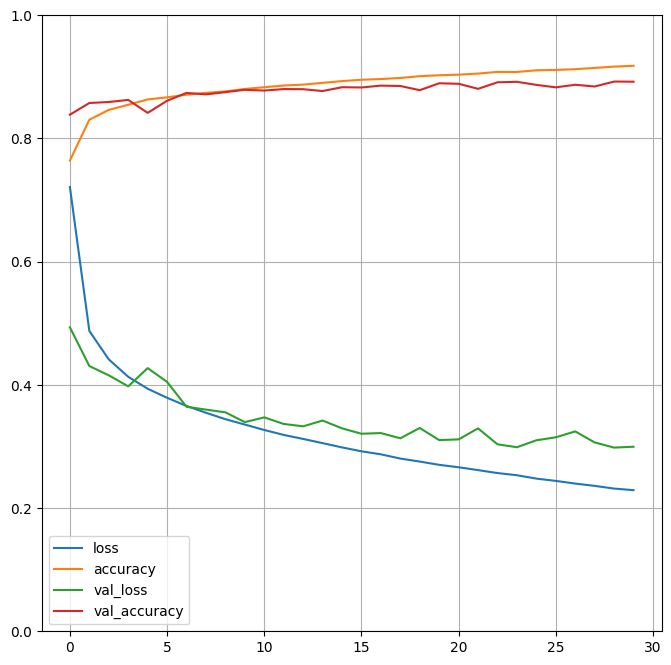

In [35]:
pd.DataFrame(history.history).plot(figsize=(8, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [36]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 68.6720 - accuracy: 0.8449


[68.67203521728516, 0.8449000120162964]

In [37]:
x_new = x_test[:3]

In [38]:
y_proba = model.predict(x_new)

1/1 [==============================] - 0s 96ms/step


In [39]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [44]:
x_new

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [43]:
y_pred = model.predict(x_new)
y_pred

1/1 [==============================] - 0s 22ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Regressão

In [45]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [46]:
housing = fetch_california_housing()

In [47]:
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [48]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full)

In [49]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [51]:
model = Sequential()
model.add(Dense(30, activation="relu", input_shape=x_train.shape[1:]))
model.add(Dense(1))

In [56]:
model.compile(loss=tf.keras.losses.mean_squared_error, optimizer=tf.keras.optimizers.Adam())

In [57]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6781 - val_loss: 0.6850
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6336 - val_loss: 0.5369
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5140 - val_loss: 0.4588
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4498 - val_loss: 0.4284
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4248 - val_loss: 0.4064
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4075 - val_loss: 0.3877
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3976 - val_loss: 0.3787
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3922 - val_loss: 0.3863
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3864 - val_loss: 0.3753
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3808 - val_loss: 0.4317

In [58]:
mse_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3483


In [59]:
x_new = x_test[:3]
y_pred = model.predict(x_new)

1/1 [==============================] - 0s 56ms/step


<Axes: >

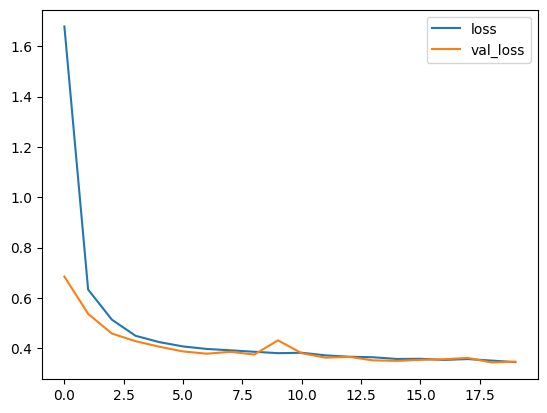

In [61]:
pd.DataFrame(history.history).plot()

In [62]:
x_train.shape

(11610, 8)

In [64]:
input_ = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [65]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_7 (Dense)             (None, 30)                   270       ['input_2[0][0]']             
                                                                                                  
 dense_8 (Dense)             (None, 30)                   930       ['dense_7[0][0]']             
                                                                                                  
 concatenate_1 (Concatenate  (None, 38)                   0         ['input_2[0][0]',             
 )                                                                   'dense_8[0][0]']         

In [73]:
model.compile(loss=tf.keras.losses.mean_squared_error, optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.R2Score()])

In [74]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30


363/363 [==============================] - 2s 3ms/step - loss: 0.2794 - r2_score: 0.7921 - val_loss: 0.3263 - val_r2_score: 0.7446
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2750 - r2_score: 0.7954 - val_loss: 0.2934 - val_r2_score: 0.7703
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2762 - r2_score: 0.7945 - val_loss: 0.3023 - val_r2_score: 0.7634
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2831 - r2_score: 0.7893 - val_loss: 0.3287 - val_r2_score: 0.7427
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2770 - r2_score: 0.7939 - val_loss: 0.2887 - val_r2_score: 0.7740
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2727 - r2_score: 0.7971 - val_loss: 0.2943 - val_r2_score: 0.7696
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2712 - r2_score: 0.7982 - val_loss: 0.2852 - val_r2_score: 0.7768
Epoch 8/30
363/36

<Axes: >

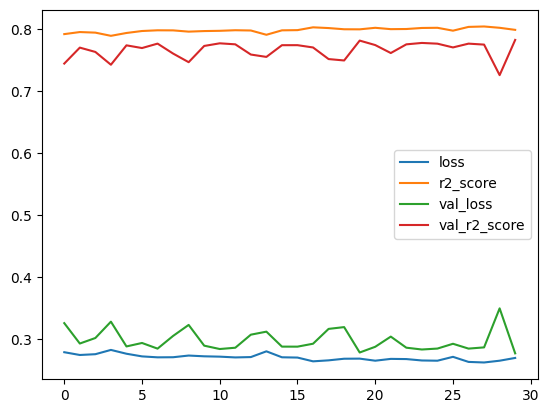

In [75]:
pd.DataFrame(history.history).plot()

In [76]:
model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.2855 - r2_score: 0.7876


[0.2854672074317932, 0.7876154184341431]

In [85]:
x_train_A, x_train_B = x_train[:, :5], x_train[:, 2:]
x_valid_A, x_valid_B = x_valid[:, :5], x_valid[:, 2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]
x_new_A, x_new_B = x_test_A[:3], x_test_B[:3]

In [107]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [108]:
model.compile(
    loss=["mse", "mse"],loss_weights=[0.9, 0.1], metrics=[tf.keras.metrics.R2Score()]
)

In [109]:
history = model.fit([x_train_A, x_train_B], [y_train, y_train], epochs=20, validation_data=([
    x_valid_A, x_valid_B
], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.3174 - main_output_loss: 1.2632 - aux_output_loss: 1.8056 - main_output_r2_score: 0.0601 - aux_output_r2_score: -0.3435 - val_loss: 0.5884 - val_main_output_loss: 0.5525 - val_aux_output_loss: 0.9119 - val_main_output_r2_score: 0.5675 - val_aux_output_r2_score: 0.2863
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4811 - main_output_loss: 0.4568 - aux_output_loss: 0.6999 - main_output_r2_score: 0.6601 - aux_output_r2_score: 0.4792 - val_loss: 0.4309 - val_main_output_loss: 0.4120 - val_aux_output_loss: 0.6014 - val_main_output_r2_score: 0.6775 - val_aux_output_r2_score: 0.5293
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4361 - main_output_loss: 0.4203 - aux_output_loss: 0.5779 - main_output_r2_score: 0.6873 - aux_output_r2_score: 0.5700 - val_loss: 0.4124 - val_main_output_loss: 0.3927 - val_aux_output_loss: 0.5896 - val_main_output_r2_score: 0.6926 -

<Axes: >

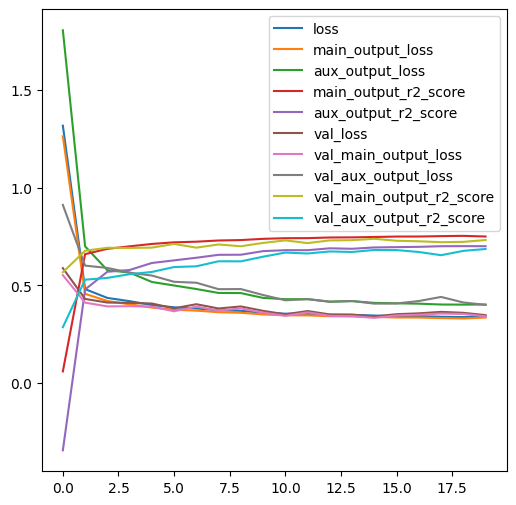

In [110]:
pd.DataFrame(history.history).plot(figsize=(6, 6))

### Usando a Subclassing API para construir Modelos Dinâmicos

In [91]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [92]:
model = WideAndDeepModel()

In [96]:
model.call([input_A, input_B])

(<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_16')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_17')>)

In [101]:
model.compile(
    loss=["mse", "mse"],loss_weights=[0.9, 0.1], metrics=[tf.keras.metrics.R2Score()]
)

In [102]:
history = model.fit([x_train_A, x_train_B], [y_train, y_train], epochs=20, validation_data=([
    x_valid_A, x_valid_B
], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.8447 - output_1_loss: 1.8183 - output_2_loss: 2.0827 - output_1_r2_score: -0.3529 - output_2_r2_score: -0.5497 - val_loss: 0.7115 - val_output_1_loss: 0.6975 - val_output_2_loss: 0.8380 - val_output_1_r2_score: 0.4541 - val_output_2_r2_score: 0.3441
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5741 - output_1_loss: 0.5571 - output_2_loss: 0.7277 - output_1_r2_score: 0.5855 - output_2_r2_score: 0.4585 - val_loss: 0.5235 - val_output_1_loss: 0.4985 - val_output_2_loss: 0.7478 - val_output_1_r2_score: 0.6098 - val_output_2_r2_score: 0.4147
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4652 - output_1_loss: 0.4469 - output_2_loss: 0.6304 - output_1_r2_score: 0.6675 - output_2_r2_score: 0.5309 - val_loss: 0.4280 - val_output_1_loss: 0.4052 - val_output_2_loss: 0.6335 - val_output_1_r2_score: 0.6828 - val_output_2_r2_score: 0.5041
Epoch 4/20
363/363 [======

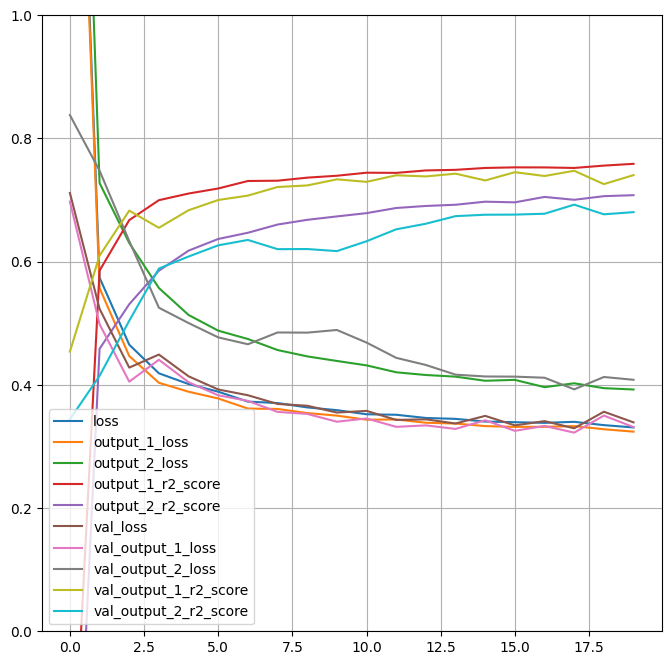

In [105]:
pd.DataFrame(history.history).plot(figsize=(8, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [112]:
model.save("models/my_keras_model.h5")
model.save_weights("models/weights/my_keras_model_weights.h5")

c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
